In [1]:
from kedro.io import DataCatalog
import yaml
import logging

logger = logging.getLogger(__name__)

with open("catalog.yml") as f:
    conf_catalog = yaml.safe_load(f)

catalog = DataCatalog.from_config(conf_catalog)
paa_12_sam = catalog.load("paa_12_sam") # list
# paa_10_sam = catalog.load("paa_10_sam")
# paa_8_sam = catalog.load("paa_8_sam")
paa_12_cv = catalog.load("paa_12_cv") # dict
# paa_10_cv = catalog.load("paa_10_cv")
# paa_8_cv = catalog.load("paa_8_cv")


In [2]:
print(f"type(paa_12_sam): {type(paa_12_sam)}")
print(f"type(paa_12_cv): {type(paa_12_cv)}")


type(paa_12_sam): <class 'list'>
type(paa_12_cv): <class 'dict'>


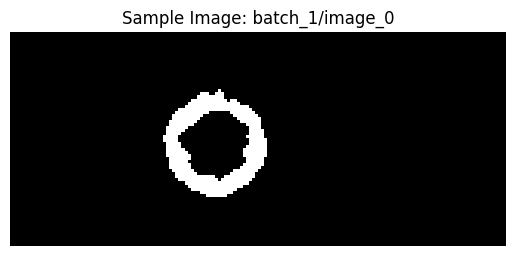

In [4]:
import matplotlib.pyplot as plt

def show_first_sample_image(paa_12_cv):
    """
    Displays the first sample image from the paa_12_cv dictionary.
    
    Parameters:
    paa_12_cv (dict): Dictionary containing image data.
    """
    if paa_12_cv:
        first_key = next(iter(paa_12_cv))
        image = paa_12_cv[first_key]
        plt.imshow(image, cmap='gray')
        plt.title(f"Sample Image: {first_key}")
        plt.axis('off')
        plt.show()
    else:
        print("The dictionary is empty.")

# Example usage:
show_first_sample_image(paa_12_cv)

In [6]:
def inspect_list(paa_12_sam, num_elements=5):
    """
    Prints the first few elements of the paa_12_sam list.
    
    Parameters:
    paa_12_sam (list): List containing image data.
    num_elements (int): Number of elements to print. Default is 5.
    """
    if paa_12_sam:
        print(f"First {num_elements} elements in paa_12_sam:")
        for i, element in enumerate(paa_12_sam[:num_elements]):
            print(f"Element {i}: {type(element)}, shape: {getattr(element, 'shape', 'N/A')}")
    else:
        print("The list is empty.")

# Example usage:
inspect_list(paa_12_sam)

First 5 elements in paa_12_sam:
Element 0: <class 'dict'>, shape: N/A
Element 1: <class 'dict'>, shape: N/A
Element 2: <class 'dict'>, shape: N/A
Element 3: <class 'dict'>, shape: N/A
Element 4: <class 'dict'>, shape: N/A


In [11]:
def print_recursive_keys(d, indent=0):
    """
    Recursively prints the keys and types of a dictionary or list.
    
    Parameters:
    d (dict or list): The dictionary or list to inspect.
    indent (int): The current indentation level (used for nested structures).
    """
    if isinstance(d, dict):
        for key, value in d.items():
            print(' ' * indent + f"Key: {key}, Type: {type(value)}")
            if isinstance(value, (dict, list)):
                print_recursive_keys(value, indent + 2)
    elif isinstance(d, list):
        for i, value in enumerate(d):
            print(' ' * indent + f"Index: {i}, Type: {type(value)}")
            if isinstance(value, (dict, list)):
                print_recursive_keys(value, indent + 2)

# Example usage:
print_recursive_keys(paa_12_sam[2])

Key: original_image, Type: <class 'torch.Tensor'>
Key: masks, Type: <class 'list'>
  Index: 0, Type: <class 'torch.Tensor'>
